Experiment #1
score: 7
commands: RRDD


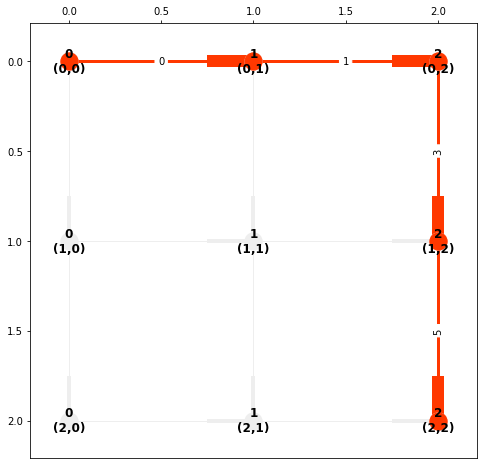

Experiment #2
score: 66
commands: DDDRRDRRRD


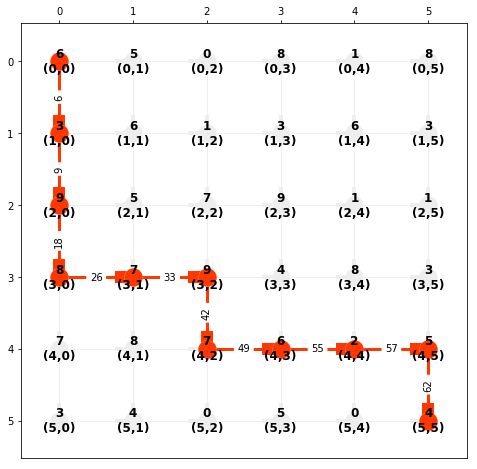

Experiment #3
score: 55555
commands: RRRDDDDRDRDDDRDRDRDRRRDDDDDDRRDRDDRRDDDDDRRRDRRDDRDRDDRRDRRRDRRRDRDDRRRDRRDRRDRDRRDDDDRDDRDDRDRRRR


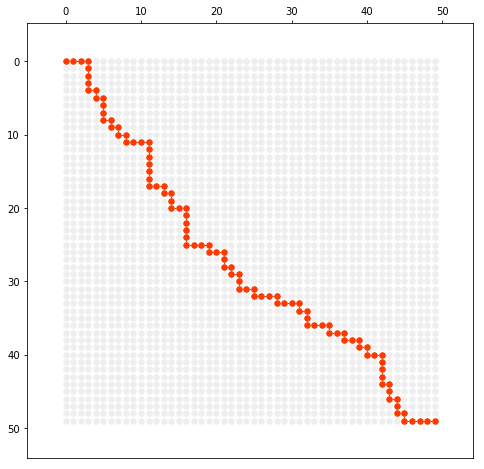

In [1]:
import networkx as nx
import json

TEST_DATA_1 = json.loads("""
[[293, 471, 409, 485, 294, 463, 256, 531, 416, 259, 496, 29, 706, 767, 390, 28, 550, 746, 142, 465, 458, 204, 526, 62, 269, 100, 112, 358, 661, 78, 157, 38, 633, 768, 254, 689, 200, 250, 144, 503, 0, 237, 246, 484, 120, 417, 213, 31, 651, 408],
 [139, 582, 279, 647, 54, 68, 730, 646, 561, 581, 750, 71, 451, 551, 694, 628, 247, 281, 71, 52, 72, 706, 84, 718, 106, 182, 248, 764, 581, 698, 476, 10, 757, 570, 397, 660, 137, 47, 473, 546, 285, 745, 69, 767, 731, 631, 234, 260, 772, 53],
 [404, 27, 210, 559, 12, 439, 112, 117, 411, 568, 425, 171, 115, 382, 60, 310, 695, 447, 239, 763, 241, 205, 545, 469, 679, 67, 579, 89, 167, 478, 71, 646, 739, 332, 632, 355, 165, 160, 294, 111, 720, 251, 397, 162, 553, 591, 640, 26, 762, 20],
 [601, 374, 576, 420, 496, 134, 188, 335, 736, 192, 287, 322, 312, 566, 409, 327, 298, 329, 16, 519, 148, 433, 91, 464, 312, 165, 718, 388, 299, 548, 589, 302, 354, 70, 650, 605, 379, 405, 463, 637, 771, 587, 708, 155, 325, 678, 751, 667, 248, 371],
 [78, 732, 62, 650, 691, 171, 462, 633, 605, 268, 546, 606, 588, 70, 562, 675, 90, 779, 633, 370, 277, 749, 629, 648, 431, 79, 32, 357, 417, 408, 724, 28, 22, 272, 25, 746, 656, 574, 530, 591, 137, 531, 288, 40, 493, 401, 337, 261, 731, 399],
 [428, 684, 233, 427, 699, 771, 236, 154, 216, 566, 474, 746, 467, 48, 16, 573, 166, 576, 555, 611, 660, 715, 689, 308, 769, 301, 178, 90, 107, 226, 503, 770, 439, 731, 426, 505, 655, 480, 771, 117, 62, 414, 319, 118, 437, 670, 50, 316, 520, 41],
 [303, 513, 26, 573, 323, 720, 410, 457, 196, 300, 689, 10, 276, 432, 57, 48, 296, 65, 181, 760, 619, 45, 566, 495, 489, 682, 362, 250, 681, 221, 121, 210, 24, 56, 769, 237, 498, 365, 713, 496, 37, 337, 750, 82, 748, 748, 741, 37, 769, 55],
 [486, 706, 451, 102, 459, 538, 526, 227, 461, 266, 319, 128, 731, 380, 765, 154, 745, 527, 530, 629, 270, 409, 545, 332, 242, 557, 40, 719, 7, 551, 665, 726, 702, 231, 46, 746, 279, 326, 761, 499, 27, 276, 586, 777, 559, 656, 369, 551, 611, 622],
 [158, 34, 394, 283, 0, 719, 685, 30, 513, 28, 254, 464, 689, 165, 743, 236, 17, 164, 479, 42, 357, 123, 282, 677, 525, 462, 11, 664, 682, 327, 401, 83, 744, 211, 203, 92, 197, 157, 465, 511, 276, 547, 652, 116, 610, 190, 261, 319, 67, 76],
 [54, 714, 460, 463, 221, 481, 317, 529, 277, 551, 215, 60, 25, 446, 233, 780, 296, 89, 185, 55, 208, 686, 191, 693, 733, 616, 176, 171, 760, 392, 600, 269, 102, 326, 71, 135, 553, 135, 217, 53, 27, 569, 405, 70, 394, 687, 613, 243, 427, 194],
 [334, 262, 121, 449, 542, 717, 74, 756, 652, 31, 69, 415, 38, 189, 393, 61, 144, 749, 406, 307, 706, 486, 339, 513, 249, 183, 163, 59, 244, 96, 657, 572, 420, 378, 747, 389, 522, 480, 350, 666, 516, 102, 621, 519, 179, 254, 502, 505, 568, 128],
 [613, 623, 79, 551, 543, 209, 335, 149, 47, 636, 694, 481, 692, 110, 450, 621, 491, 376, 265, 714, 288, 561, 511, 482, 752, 132, 196, 155, 52, 489, 602, 155, 549, 650, 87, 777, 745, 483, 741, 726, 66, 509, 659, 334, 64, 654, 470, 111, 454, 291],
 [27, 279, 556, 533, 771, 323, 16, 206, 711, 660, 185, 630, 467, 464, 774, 171, 341, 599, 243, 610, 265, 686, 707, 715, 528, 337, 539, 759, 47, 624, 521, 246, 13, 577, 2, 504, 76, 115, 536, 373, 596, 635, 620, 512, 206, 419, 561, 82, 399, 16],
 [188, 60, 778, 264, 320, 703, 230, 449, 470, 131, 728, 561, 359, 445, 546, 177, 281, 727, 47, 612, 589, 279, 212, 438, 33, 63, 82, 76, 327, 128, 60, 350, 165, 189, 657, 663, 344, 334, 85, 579, 177, 453, 352, 768, 261, 541, 687, 634, 440, 172],
 [44, 433, 602, 337, 422, 509, 310, 14, 78, 262, 449, 639, 474, 692, 178, 331, 372, 134, 467, 42, 592, 536, 637, 159, 179, 67, 414, 373, 73, 59, 327, 107, 396, 137, 779, 122, 395, 208, 286, 327, 584, 118, 130, 732, 73, 731, 487, 682, 530, 675],
 [728, 241, 286, 656, 484, 160, 734, 218, 627, 549, 531, 505, 471, 173, 223, 161, 125, 37, 411, 487, 472, 570, 140, 748, 440, 446, 53, 721, 715, 490, 117, 610, 33, 180, 277, 282, 168, 548, 602, 244, 733, 750, 587, 723, 298, 297, 35, 111, 185, 496],
 [526, 82, 353, 492, 430, 463, 411, 151, 722, 331, 223, 655, 298, 124, 482, 719, 471, 265, 563, 231, 726, 560, 134, 780, 141, 85, 561, 340, 405, 389, 154, 166, 1, 645, 647, 747, 336, 628, 316, 283, 634, 623, 476, 368, 634, 158, 773, 395, 442, 437],
 [86, 220, 269, 669, 308, 309, 261, 57, 202, 767, 358, 393, 698, 337, 188, 387, 147, 324, 9, 429, 754, 612, 277, 726, 758, 703, 454, 224, 106, 81, 185, 95, 345, 157, 104, 38, 307, 37, 523, 329, 740, 331, 489, 349, 719, 515, 149, 100, 627, 432],
 [253, 447, 287, 206, 205, 459, 234, 107, 315, 637, 163, 703, 125, 450, 618, 366, 72, 211, 172, 763, 766, 316, 508, 279, 563, 38, 200, 143, 632, 111, 693, 297, 469, 757, 592, 124, 656, 174, 666, 592, 188, 417, 594, 363, 573, 655, 399, 767, 527, 662],
 [128, 441, 495, 540, 553, 209, 506, 410, 40, 68, 178, 304, 262, 38, 581, 62, 78, 492, 232, 314, 245, 123, 381, 504, 426, 94, 161, 455, 697, 156, 316, 573, 689, 331, 344, 114, 676, 488, 634, 367, 691, 736, 353, 244, 162, 245, 619, 567, 414, 563],
 [205, 632, 377, 108, 97, 526, 634, 196, 761, 761, 757, 136, 279, 399, 331, 769, 484, 122, 383, 281, 93, 598, 426, 268, 30, 192, 301, 734, 613, 494, 296, 75, 208, 85, 584, 57, 580, 579, 108, 398, 465, 408, 172, 136, 269, 281, 659, 6, 398, 162],
 [711, 442, 704, 123, 554, 50, 271, 246, 160, 4, 271, 3, 759, 621, 610, 33, 777, 29, 49, 30, 164, 347, 124, 1, 208, 723, 280, 50, 588, 687, 191, 606, 124, 91, 512, 358, 234, 140, 761, 496, 685, 67, 74, 586, 769, 123, 201, 337, 192, 403],
 [643, 163, 439, 138, 170, 9, 453, 255, 693, 302, 389, 465, 175, 153, 465, 152, 759, 388, 70, 378, 573, 138, 560, 114, 305, 543, 619, 640, 432, 429, 614, 115, 416, 267, 78, 520, 176, 568, 406, 363, 727, 81, 308, 665, 405, 326, 549, 409, 402, 0],
 [196, 25, 751, 666, 169, 460, 523, 217, 11, 703, 321, 707, 352, 4, 460, 390, 347, 657, 60, 139, 352, 667, 355, 203, 627, 153, 404, 539, 25, 255, 714, 502, 641, 759, 52, 764, 116, 773, 286, 285, 64, 741, 102, 335, 195, 195, 762, 753, 274, 1],
 [459, 146, 415, 190, 103, 661, 560, 736, 335, 313, 49, 713, 178, 307, 214, 305, 767, 473, 225, 236, 443, 695, 491, 335, 238, 692, 287, 316, 721, 425, 738, 746, 318, 193, 54, 153, 182, 78, 346, 653, 325, 38, 1, 490, 128, 348, 104, 275, 415, 111],
 [231, 331, 174, 660, 376, 114, 672, 278, 751, 337, 208, 191, 103, 739, 532, 18, 725, 732, 497, 636, 420, 515, 467, 673, 204, 406, 693, 778, 385, 603, 730, 281, 236, 645, 707, 521, 342, 82, 7, 444, 650, 375, 259, 140, 367, 461, 239, 130, 148, 576],
 [590, 707, 16, 648, 144, 113, 613, 421, 122, 84, 762, 258, 552, 306, 458, 478, 105, 700, 389, 539, 471, 749, 180, 147, 590, 421, 727, 771, 358, 37, 298, 671, 592, 420, 740, 717, 708, 174, 293, 159, 610, 143, 710, 325, 208, 674, 4, 208, 697, 493],
 [207, 128, 768, 191, 598, 649, 433, 740, 148, 277, 316, 231, 18, 699, 520, 779, 677, 620, 350, 658, 278, 733, 38, 478, 760, 432, 541, 178, 361, 618, 10, 546, 417, 589, 329, 121, 605, 222, 409, 597, 183, 633, 120, 463, 727, 447, 324, 515, 514, 123],
 [502, 162, 706, 292, 322, 620, 600, 422, 12, 111, 366, 176, 10, 508, 609, 760, 561, 197, 92, 233, 412, 675, 190, 562, 401, 434, 391, 282, 580, 346, 173, 119, 438, 296, 501, 157, 266, 724, 257, 492, 358, 31, 662, 85, 30, 694, 131, 643, 50, 571],
 [357, 658, 693, 98, 83, 1, 12, 568, 201, 436, 384, 272, 735, 404, 12, 27, 18, 683, 413, 548, 332, 117, 705, 636, 540, 215, 420, 448, 767, 107, 623, 358, 235, 392, 378, 508, 90, 436, 613, 28, 524, 550, 12, 54, 119, 562, 133, 147, 453, 207],
 [755, 457, 419, 447, 638, 671, 253, 720, 533, 716, 730, 396, 539, 374, 65, 321, 419, 121, 62, 236, 550, 495, 306, 518, 275, 554, 83, 749, 218, 170, 81, 105, 639, 373, 315, 760, 729, 407, 497, 723, 38, 699, 294, 423, 429, 646, 694, 293, 272, 352],
 [403, 260, 500, 771, 512, 178, 535, 594, 658, 569, 720, 363, 390, 515, 227, 445, 686, 49, 693, 302, 259, 516, 94, 390, 770, 552, 288, 270, 143, 448, 467, 429, 567, 85, 422, 314, 779, 481, 292, 732, 384, 669, 624, 379, 117, 170, 42, 348, 222, 200],
 [429, 344, 323, 464, 712, 588, 279, 636, 500, 182, 207, 376, 370, 87, 164, 570, 370, 630, 779, 670, 394, 308, 353, 470, 439, 680, 149, 645, 567, 318, 780, 100, 732, 268, 542, 745, 237, 151, 684, 455, 439, 775, 369, 127, 439, 537, 766, 98, 434, 420],
 [617, 199, 509, 504, 629, 2, 103, 206, 517, 45, 384, 151, 568, 80, 298, 774, 417, 42, 288, 627, 614, 746, 45, 183, 216, 215, 609, 457, 546, 736, 248, 700, 119, 328, 373, 113, 329, 649, 702, 169, 680, 94, 37, 343, 739, 128, 107, 686, 272, 646],
 [2, 596, 108, 305, 26, 735, 584, 572, 224, 714, 144, 38, 709, 150, 701, 766, 232, 150, 370, 315, 32, 570, 279, 691, 405, 652, 19, 395, 98, 51, 177, 383, 765, 92, 174, 561, 430, 16, 128, 497, 68, 360, 681, 571, 554, 147, 426, 622, 395, 384],
 [676, 251, 610, 716, 98, 332, 636, 196, 409, 717, 23, 721, 625, 594, 482, 596, 576, 658, 632, 391, 52, 570, 98, 186, 244, 596, 242, 506, 688, 283, 762, 376, 669, 143, 244, 76, 691, 106, 336, 339, 152, 717, 480, 339, 144, 138, 134, 671, 672, 707],
 [168, 232, 571, 512, 757, 213, 696, 153, 227, 66, 603, 401, 383, 501, 682, 274, 165, 320, 141, 97, 393, 485, 100, 368, 463, 368, 435, 708, 547, 101, 535, 682, 557, 536, 164, 288, 474, 534, 357, 317, 551, 43, 62, 225, 484, 354, 492, 97, 277, 222],
 [516, 322, 456, 373, 50, 291, 692, 229, 495, 619, 738, 58, 606, 38, 313, 89, 500, 152, 391, 492, 56, 639, 719, 460, 652, 36, 657, 400, 409, 78, 675, 659, 531, 56, 150, 516, 590, 438, 225, 714, 713, 394, 92, 196, 438, 483, 571, 321, 94, 466],
 [727, 8, 742, 31, 105, 514, 345, 747, 650, 667, 77, 576, 240, 185, 348, 647, 328, 37, 83, 256, 190, 130, 73, 408, 207, 603, 321, 642, 77, 49, 434, 270, 453, 304, 449, 204, 105, 655, 403, 565, 414, 463, 761, 426, 218, 106, 76, 338, 654, 428],
 [189, 440, 621, 780, 156, 41, 47, 748, 484, 204, 654, 73, 689, 604, 92, 358, 526, 636, 618, 45, 731, 67, 585, 466, 506, 351, 549, 269, 357, 749, 195, 520, 275, 331, 195, 565, 62, 123, 507, 741, 720, 105, 591, 142, 167, 477, 175, 558, 23, 158],
 [385, 137, 322, 339, 692, 44, 17, 109, 316, 634, 162, 304, 554, 599, 434, 124, 526, 657, 60, 539, 28, 769, 213, 590, 499, 174, 463, 244, 20, 65, 384, 465, 315, 22, 469, 478, 535, 30, 89, 19, 731, 353, 402, 241, 271, 172, 113, 684, 7, 532],
 [693, 538, 232, 485, 362, 649, 605, 138, 73, 587, 536, 351, 426, 64, 221, 208, 32, 413, 246, 440, 495, 210, 766, 64, 159, 331, 77, 688, 510, 726, 193, 87, 518, 572, 399, 257, 497, 591, 484, 449, 268, 73, 402, 63, 211, 341, 545, 130, 196, 614],
 [379, 120, 40, 113, 83, 83, 406, 63, 769, 31, 204, 413, 767, 532, 717, 651, 258, 433, 266, 149, 649, 482, 219, 401, 287, 696, 583, 43, 125, 300, 315, 772, 77, 289, 574, 476, 410, 760, 93, 768, 420, 112, 690, 221, 119, 763, 533, 163, 515, 422],
 [437, 664, 645, 536, 517, 222, 426, 99, 348, 427, 319, 356, 339, 559, 528, 16, 569, 749, 686, 748, 324, 152, 632, 576, 87, 276, 693, 517, 623, 675, 592, 65, 616, 558, 486, 419, 252, 228, 240, 234, 588, 478, 620, 386, 7, 227, 14, 281, 625, 278],
 [241, 544, 294, 415, 188, 620, 734, 252, 224, 688, 731, 93, 2, 267, 467, 693, 343, 725, 302, 387, 476, 617, 526, 596, 219, 233, 602, 171, 233, 474, 675, 113, 694, 361, 647, 119, 290, 449, 377, 742, 586, 20, 521, 664, 237, 625, 7, 660, 562, 259],
 [7, 656, 407, 455, 759, 513, 677, 503, 127, 348, 498, 209, 708, 182, 242, 662, 519, 263, 123, 529, 125, 172, 586, 213, 140, 294, 207, 138, 218, 552, 704, 75, 263, 331, 195, 335, 479, 102, 278, 162, 760, 205, 338, 417, 303, 687, 685, 78, 732, 645],
 [110, 722, 26, 317, 642, 364, 359, 345, 115, 33, 39, 280, 472, 699, 375, 336, 345, 733, 767, 465, 646, 172, 253, 771, 11, 518, 291, 318, 25, 173, 15, 449, 56, 422, 461, 378, 398, 726, 591, 615, 603, 100, 480, 628, 452, 594, 504, 653, 611, 682],
 [135, 551, 547, 467, 675, 574, 85, 42, 137, 748, 730, 712, 85, 660, 175, 633, 559, 476, 390, 264, 623, 4, 542, 327, 491, 445, 285, 4, 199, 17, 236, 705, 462, 352, 508, 234, 752, 478, 347, 562, 191, 553, 104, 276, 778, 654, 0, 759, 51, 519],
 [352, 180, 360, 251, 454, 144, 53, 447, 103, 191, 135, 488, 444, 59, 417, 489, 422, 489, 586, 384, 93, 299, 737, 535, 302, 3, 444, 448, 204, 195, 640, 156, 587, 440, 614, 766, 516, 117, 157, 581, 705, 580, 60, 15, 767, 358, 232, 283, 230, 340],
 [54, 17, 732, 206, 9, 643, 250, 163, 738, 109, 36, 519, 708, 555, 158, 316, 194, 242, 499, 484, 626, 300, 101, 406, 719, 541, 30, 702, 180, 578, 444, 441, 457, 547, 530, 483, 624, 235, 119, 79, 744, 290, 262, 668, 95, 629, 442, 475, 733, 544]]
""")

TEST_DATA_2 = json.loads("""
[[6,5,0,8,1,8],
[3,6,1,3,6,3],
[9,5,7,9,1,1],
[8,7,9,4,8,3],
[7,8,7,6,2,5],
[3,4,0,5,0,4]]
""")

TEST_DATA_3 = json.loads("""
[
[0,1,2],
[0,1,2],
[0,1,2]
]
""")

def solve(graph):
    graph = nx.DiGraph()

    num_rows = len(data)
    num_cols = len(data[0])
    max_value = max([max(row) for row in data])
    for row in range(num_rows):
        for col in range(num_cols):
            this_node = (row,col)
            this_value = data[row][col]
            if col < num_cols - 1:
                right_node = (row,col+1)
                right_value = data[row][col+1]
                graph.add_edge(this_node, right_node, 
                               distance=right_value, 
                               inv_distance=max_value-right_value)
            if row < num_rows - 1:
                bottom_node = (row+1,col)
                bottom_value = data[row+1][col]
                graph.add_edge(this_node, bottom_node, 
                               distance=bottom_value, 
                               inv_distance=max_value-bottom_value)
    path = nx.shortest_path(
        graph, source=(0,0), target=(num_rows-1,num_cols-1), weight="inv_distance")
    score = sum(map(lambda pos: data[pos[0]][pos[1]], path))
    return (score, graph, path)
    
def visualize(data, graph, path, isLarge):
    path_edges = list(zip(path, path[1:]))
    path_edge_labels = {}
    s = data[0][0]
    for from_node, to_node in path_edges:
        path_edge_labels[(from_node, to_node)] = str(s)
        s += data[to_node[0]][to_node[1]]
        
    node_labels = {node: "%d\n(%d,%d)" % (
        data[node[0]][node[1]], 
        node[0], 
        node[1]) for node in graph.nodes()}
    
    positions = {node: [node[1], node[0]] for node in graph.nodes()}

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8,8))    
    if isLarge:
        nx.draw_networkx_nodes(graph, positions, ax=ax, node_color="#eeeeee", node_size=30)
        nx.draw_networkx_nodes(graph, positions, ax=ax, nodelist=path, node_color="#ff3800", node_size=30)
        nx.draw_networkx_edges(graph, positions, ax=ax, edgelist=path_edges, edge_color="#ff3800", width=1)        
    else:
        nx.draw_networkx_nodes(graph, positions, ax=ax, node_color="#eeeeee")
        nx.draw_networkx_labels(graph, positions, ax=ax, font_weight="bold", labels=node_labels)
        nx.draw_networkx_edges(graph, positions, ax=ax, edge_color="#eeeeee")
        nx.draw_networkx_nodes(graph, positions, ax=ax, nodelist=path, node_color="#ff3800")
        nx.draw_networkx_edges(graph, positions, ax=ax, edgelist=path_edges, edge_color="#ff3800", width=3)
        nx.draw_networkx_edge_labels(graph, positions, ax=ax, edge_labels=path_edge_labels)
        
    ax.xaxis.tick_top()
    ax.invert_yaxis()
    plt.show()
    
def make_commands(path):
    commands = ""
    for i in range(1, len(path)):
        previous_pos = path[i - 1]
        this_pos = path[i]
        if previous_pos[0] < this_pos[0]:
            commands += "D"
        elif previous_pos[1] < this_pos[1]:
            commands += "R"
    return commands

experiments = [
    (TEST_DATA_3, False),
    (TEST_DATA_2, False),
    (TEST_DATA_1, True)
]
for i, experiment in enumerate(experiments):
    data, isLarge = experiment
    (score, graph, path) = solve(data)
    commands = make_commands(path)
    print("Experiment #%d" % (i + 1))
    print("score: %d\ncommands: %s" % (score, commands))
    visualize(data, graph, path, isLarge)